# Free Code Camp MAGIC Dataset Lesson
# Mariah Noelle Cornelio
### Video Used: https://youtu.be/i_LwzRVP7bg?si=q0RcxMpMv5_mnBpN

## Importing packages and dataset

In [1]:
# !pip install imbalanced-learn
## In terminal:
# pip install --upgrade scikit-learn 
# pip install --upgrade imbalanced-learn

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

## First look at dataset and prepare dataset

In [3]:
cols=["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data", names=cols) # Pands reads the csv file in directory
# Since the original df did not come with column names, we make a cols list with the attribute names and then set it to that
df.head() 

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [4]:
df["class"].unique() # This shows unique values of class column - g for gamma and h for hadrons

array(['g', 'h'], dtype=object)

In [5]:
# Since it is just g and h and computers are better at reading numbers, set g=1 and h=0 for binary classification
df["class"]=(df["class"]=="g").astype(int) # If equals g, then True, then 1

# For this machine learning lesson, we want to predict for future samples if class is g or h (classification)
# Features are the column names - helps predict the label (class column)
# This is supervised learning because we already know the class

## Machine Learning For Everyone Notes

### What is machine learning? 
Subdomain of computer science that focues on algorithms which help a computer learn from data without explicit programming.

### AI vs ML vs DS
- AI is artificial intelligence (computers perform/simulate human behavior)
- ML is a subset of AI that solves a problem and makes prediction using data
- DS is a field that finds patterns and draw insights from data (can use ML) 

### Types of Machine Learning
1) Supervised - uses labeled inputs (meaning there is output label) to learn outputs (like a picture of cat that says "cat" on it.
2) Unsupervised - uses unlabeled data to learn about patterns in data (like a picture of cats but there is no label, finding something in common like the pointy ears)
3) Reinforcement learning - agent learning in interactive environment based on rewards and penalties (like training a dog)

### Supervised learning - machine learning model
- Inputs (feature vectors) > Model > Output (prediction, target for feature vector)
- Features matrix, X > Model > Labels/targets vector, y

### Types of features
- Qualitative: categorical data (finite number like gender or nationalities)
    - Nominal data: no inherent data ^^^ can't really rate them (to feed into computer, use one-hot encoding that says if it matches category, make it a 1 and else, 0)
    - Age groups, ratings are more examples (Ordinal data: there is an inherent order)
- Quantitative: numerical valued data (discrete or continuous)
    - Length, temperature, how many eggs I collected in my basket this Easter 
    
### Types of predictions
- Classification (predict discrete classes - this is a hotdog, pizza, and ice cream)
    - Multiclass classification ^^^ (cat/dog/lizard/dolphin/shark, plant species)
    - Binary classification (hotdog or not hotdog, positive/negative, spam/not spam)
- Regression (predict continuous values - coming up with a number)
    - Price of Doge coin tomorrow, what is temperature, price of house
    
### How to make model learn - is it working or not?
#### How to know what is a good model or not
- (TRAINING) Each row is fed into a model and then it will output a y and we can compare with the real answer to see if it is right - if not then we can always adjust some things (supervised)
- Do you really want to put in the whole data into the model? No, not really because we cannot assess how well the model generalizes new data
    - So we break it up into 3 datasets (training, validation, and testing)
        - Feed training into model
        - Figure out difference between prediction and true values (LOSS)
        - Make adjustments
        - Then put validation set through model (reality check to ensure model can handle unseen data) -> see what loss is in validatoin set but key difference is we do not feedback the loss into the model unlike in training
        
### Loss
The lesser the loss for a model, the better! Use test set as a final check to see how generalizable the chosen model is. That loss is called the final reported performance of the model.
- Loss is difference between prediction and label
- L1 Loss (absolute value V)
    - loss=sum(|yreal-ypredicted|) (further off, the greater the loss is)
- L2 Loss (quadratic U)
    - loss=sum((yreal-ypredicted)^2)
- Binary Cross-Entropy Loss
    - loss= -1/N* sum (yreal*log(ypredicted)+(1-yreal)*log((1-ypredicted))) (loss decreases as performance gets better)
    
### Metric of Performance
- Accuracy - however many is correct

In [6]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

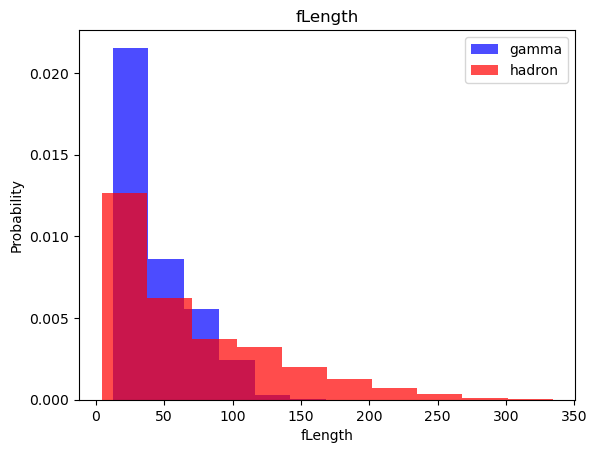

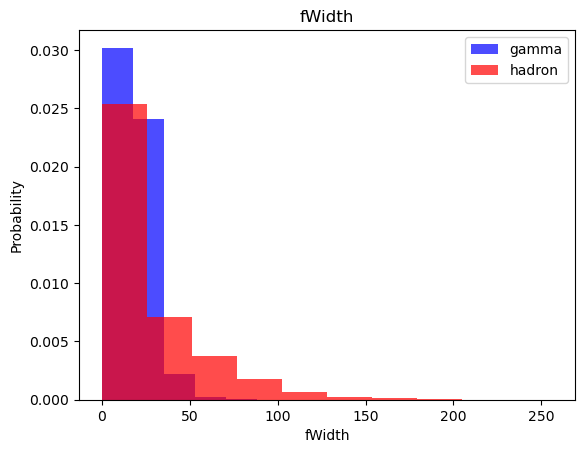

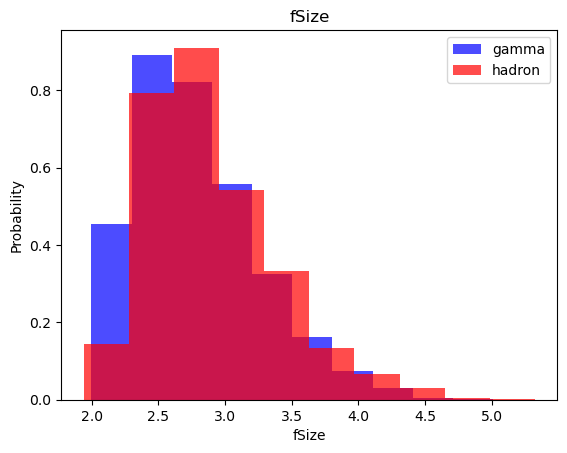

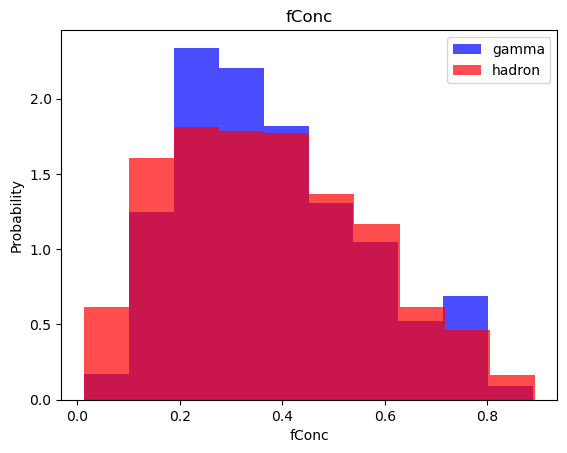

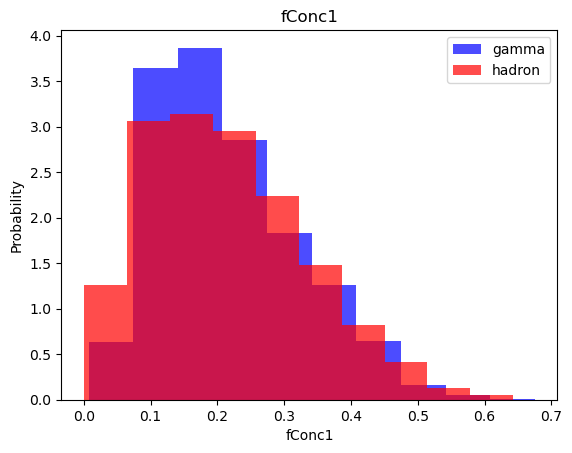

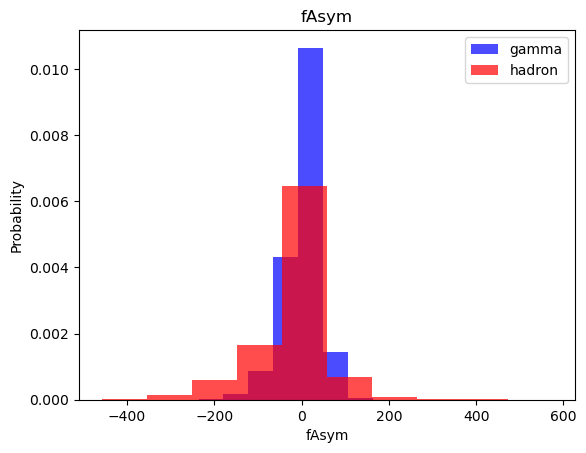

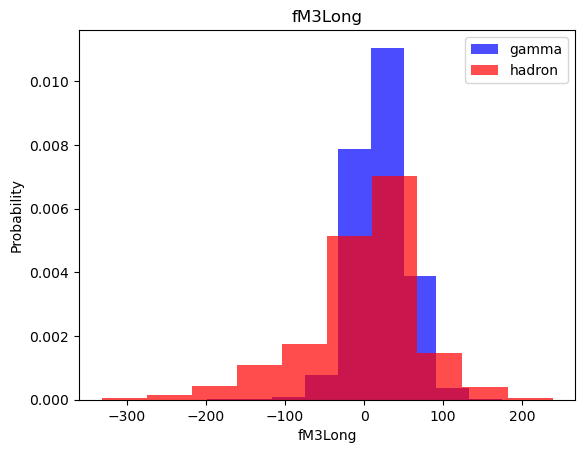

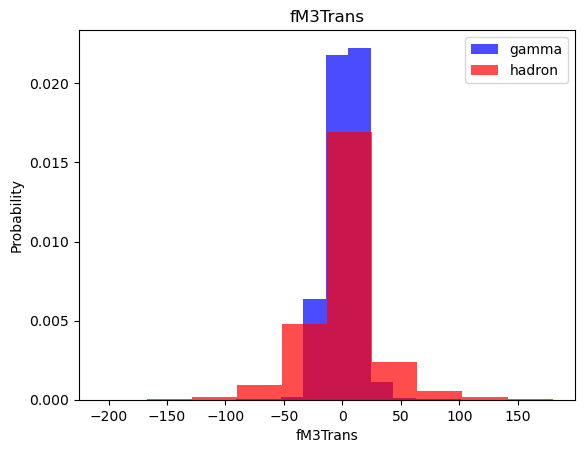

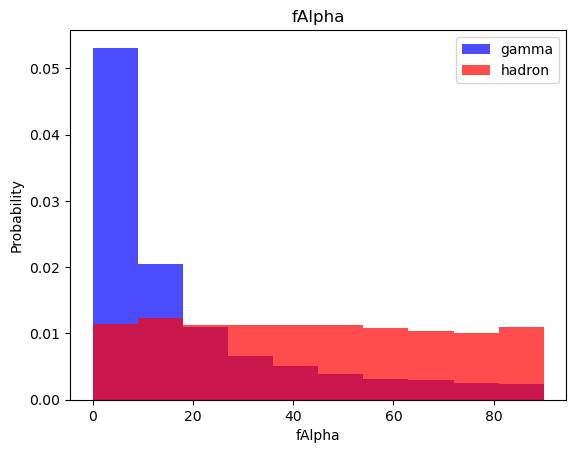

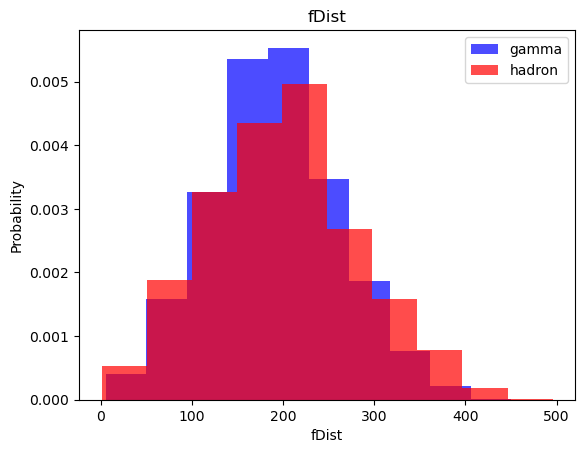

In [7]:
for label in cols[:-1]: # Takes everything except last column if class = 1 (g)
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    # Alpha is the transparency, density normalizes distributions (so if one is 200 and the other is 50, it is normalized)

In [8]:
# We see that if length is smaller, then it is most likely to be gamma
# If assymetry is larger then it is most likely hadron
# Hadrons are evenly distributed, if smaller then more gamma for alpha

## Create train, validation, and test datasets

In [9]:
train, valid, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) 
# Shuffles data -> 0-60% is train, 60-80% is validation, and rest goes to testing

In [10]:
def scale_dataset(dataframe, oversample=False): # We need to scale because if not, it can throw off results
    X=dataframe[dataframe.columns[:-1]].values # This assumes classification is the last column
    y=dataframe[dataframe.columns[-1]].values
    
    scaler=StandardScaler()
    X=scaler.fit_transform(X) # Fits and transforms X
    
    if oversample:
        ros=RandomOverSampler()
        X, y=ros.fit_resample(X, y) # Samples more of the smaller class
    
    data=np.hstack((X, np.reshape(y, (-1,1)))) # take two arrays and stack them together (side by side, not on top)
    # Numpy is particular about dimensions - here X is 2d but y is only a 1D vector so we need to reshape it
    # -1 is the same thing as len(y) 
    return data, X, y

In [11]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadrons

# 7.4k gammas and ~4k hadrons which can be an issue so we want to oversample training dataset ^^^

7398
4014


In [12]:
train, X_train, y_train=scale_dataset(train, oversample=True) # Only need to oversample for training set
valid, X_valid, y_valid=scale_dataset(valid, oversample=False)
test, X_test, y_test=scale_dataset(test, oversample=False)

In [13]:
len(y_train)

14796

In [14]:
sum(y_train==1)

7398

In [15]:
sum(y_train==0) # Now they are evenly rebalanced

7398

## Machine Learning For Everyone Notes

### Different Types of models for classification
#### 1) K Nearest Neighbors (kNN)
- In binary, if you place a sample randomly, you look at what is around you and then take the label of the majority that is around it
- Define a distance function (Euclidean distance - straight line distance to the next point)
    - d=sqrt((x1-x2)^2+(y1-y2)^2
- K = how many neighbors to use to judge which neighbor to use (3 or 5 usually)
- If you have more features, you can expand distance function to include all 10 dimensions
    - Square root of everything and find what it closest to point to classify

## K-Nearest Neighbors (kNN) Implementation

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train) # Passes in X train and y train

KNeighborsClassifier(n_neighbors=1)

In [18]:
y_pred=knn_model.predict(X_test)

In [19]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [20]:
y_test # The actual true values

array([1, 0, 1, ..., 0, 0, 1])

In [21]:
print(classification_report(y_test, y_pred)) # This prints out the report

# 82% accurate
# Precision - https://en.wikipedia.org/wiki/Precision_and_recall
# For precision on 0, 77% are actually that class and 84% are actually class 1 and same concept for recall
# ^^ Class 0 is worse than class 1
# F1 score combines precision and recall - LOOK AT THIS ONE because of unbalanced test data

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1339
           1       0.83      0.89      0.86      2465

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [22]:
# Now try again but k=5

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Accuracy increased by 1% to 83% and 0 increased more and so did 1 by a little bit - decent for a simple model

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1339
           1       0.85      0.86      0.86      2465

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#### 2) Naive Bayes
- Understand conditional probability and Bayes Rule
- Covid test example in the video!
- P( A|B ): (go into column B and work with that, and then get the ones with A conditions / Then divide the total of column B)
    - "Condition A given that Condition B"
- Bayes Rule
    - P(A|B) = [P(B|A) * P(A) /divided by/ P(B)]
        - Posterior: P(Ck|x) -> C is for categories, k is for some number
            - x is the feature vector
        - Likelihood: P(x|Ck) -> What is the likelihood of seeing x in the category
        - Prior: P(Ck) -> What is the percentage of the category
        - Evidence: P(x) -> Evidence to find the posterior and evidence of prior
    - P(Ck|x1, x2, . . ., xn)[proportional symbol] p(Ck) (multiply everything n i=1) p(xi|Ck)
        - Left side: What is the probability we are in class k given inputs (soccer or not, rain, wind, weather)
        - If independent, then just:
            - P(x1, x2, . . ., xn|Ck) * P(Ck) / P(x1|Ck)* P(x2|Ck) * ... * P(xn|Ck)
            - This is proportional to everything on the right
- y hat (predicted y)
    - y hat = argmax(p(Ck) (multiply everything n i=1) p(xi|Ck))
    - Take k that maximizes expression on the right
    - MAP: Maximum A Posteriori
        - Pick k that is most probably so that we minimize misclassification

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model=GaussianNB()
nb_model= nb_model.fit(X_train, y_train)

In [25]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred)) # 71% accuracy is not the best

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1339
           1       0.74      0.91      0.81      2465

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



#### 3) Logistic Regression
- You can classify using regression by finding probability between 0 and 1
- The straight line is equation p = mx + b
- Since probability can only be between 0 and 1, you can set the odds equal to that
    - ln(p/1-p) = mx + b
    - p = (1-p) * e^mx+b
    - p = e^mx+b - pe^mx+b ... keep doing algebra to get:
    - p = (e^mx+b) / ([1+e]^mx+b) ... but to get a numberator of 1 on the top:
    - p = 1 / (1+e)^-(mx+b) . . . THIS IS THE SIGMOID FUNCTION
        - S(y) = 1 / 1+e^-y (just replaced y with mx+b)
        - Visually it looks like an x^3 function between 0 and 1
- Fitting data to the sigmoid function
- If there is only 1 feature x, that is simple logistic regression (x0)
    - Else, multiple logistic regression (x0, x1, x2, etc.)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lg_model=LogisticRegression()
# Penalty L2 is quadratic
lg_model=lg_model.fit(X_train, y_train)
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 80% is not bad! But not as good as kNN

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1339
           1       0.85      0.83      0.84      2465

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#### 4) Support Vector Machine (SVM)
- You have labels and the goal is to find a line/hyperplane that best divides the 2 groups
    - Line should be in the middle of the 2 groups (far from the points) 
- Can have more dimensions (if 2D, then a line; if multiple, then a hyperplane)
- Margins are the distance between the closest data point and the SVM middle line of each group
    - We want to maximize the margins
    - The data points that lie on the margin lines are support vectors
- Might not be the best model if there are outliers in the dataset
- In 1D data, if it is Label1 Label2 Label1 on the 1D array, you can make a projection
    - x0 = x 
    - x1 = x^2 (kernel trick; x (-> x, x^2))
- If you want to learn more, see how a hyperplane is found mathematically

## Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC 
# Support vector classifier

In [29]:
svm_model=SVC()
svm_model=svm_model.fit(X_train, y_train)

In [30]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# 87% wow!

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1339
           1       0.89      0.91      0.90      2465

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



#### 5) Neural Networks (NN)
- Input > Hidden Layer > Output
    - Each layer is called a neuron
    - Inputs get weighted/multiplied by a number w applying to one specific category/feature
    - The sum of all of those goes into that neuron
        - You can also add a bias term (subtract 1, add 5, etc.)
    - Sum of all those plus bias goes into activation function
        - Without an activation function, the neural network is just a linear model
        - 3 types: sigmoid, tanh, RELU
            - Sigmoid: 0 to 1
            - Tanh: -1 to 1
            - RELU: Anything less than 0 is 0 and anything greater than 0 is linear
        - We introduce this so our model does not become a linear model
    - Then you get an output
- BACKPROPAGATION (below)
- L2 loss function is a quadratic formula (mentioned in the beginning)
    - The higher you go up, the more the error so the less loss is more at the base/bottom
    - To go down, you can do gradient descent to follow the slope down
        - All different for different w's
        - Closer you get to the bottom, the smaller the step down becomes
    - Weight update: W0, new= W0, old + a* the arrow downwards
        - The actual gradient would be minus
        - Since it is negative gradient going down, it is a plus sign
        - Alpha = the learning rate (adjust how quickly steps are being taken, controls how long NN will converge, if too high then diverge)
- USE TENSORFLOW TO DO NEURAL NETWORDS BECAUSE IT IS COMPLEX

## Neural Network (NN) / Tensor Flow

In [44]:
def plot_history(history):
    fig, (ax1, ax2)= plt.subplots(1,2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)
    
    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    
    plt.show()

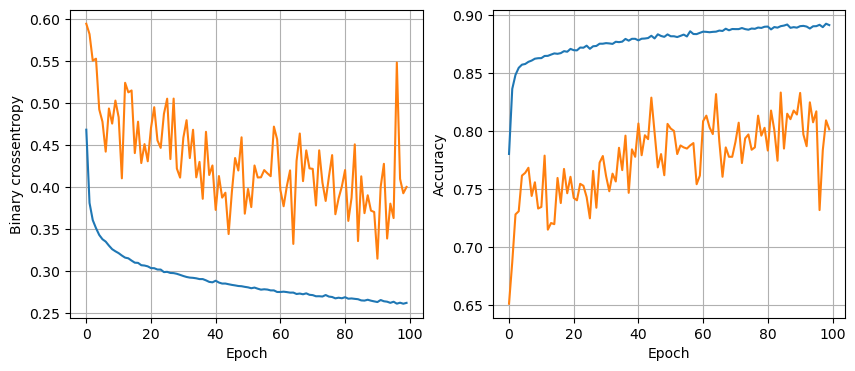

In [45]:
plot_history(history)

In [35]:
nn_model=tf.keras.Sequential([ # Makes a sequential model - this goes into this into this etc.
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)), # Creates dense 32 layers with that activation and shape
    tf.keras.layers.Dense(32, activation="relu"), # another 32 dense layers
    tf.keras.layers.Dense(1, activation="sigmoid")  #the output layer with sigmoid activation (0 or 1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy",
                metrics=["accuracy"])

In [36]:
history=nn_model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)

# This takes a minute to load!

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.7263 - loss: 0.5551 - val_accuracy: 0.6514 - val_loss: 0.5944
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8266 - loss: 0.3908 - val_accuracy: 0.6872 - val_loss: 0.5820
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8457 - loss: 0.3609 - val_accuracy: 0.7284 - val_loss: 0.5505
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8562 - loss: 0.3481 - val_accuracy: 0.7311 - val_loss: 0.5528
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8604 - loss: 0.3402 - val_accuracy: 0.7618 - val_loss: 0.4926
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8505 - loss: 0.3474 - val_accuracy: 0.7642 - val_loss: 0.4779
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8601 - loss: 0.3377 - val_accuracy: 0.7686 - val_loss: 0.4424
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8600 - loss: 0

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8848 - loss: 0.2762 - val_accuracy: 0.8095 - val_loss: 0.3929
Epoch 100/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8970 - loss: 0.2547 - val_accuracy: 0.8017 - val_loss: 0.4004


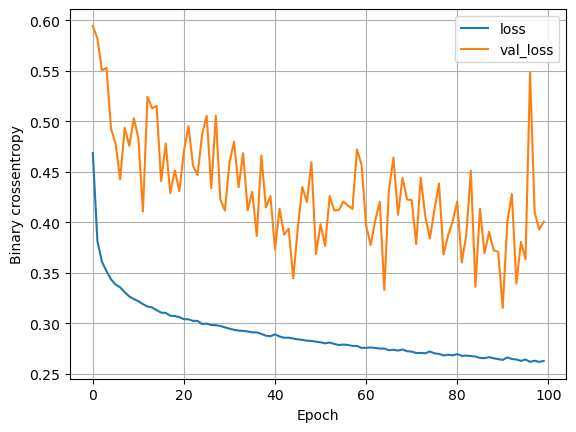

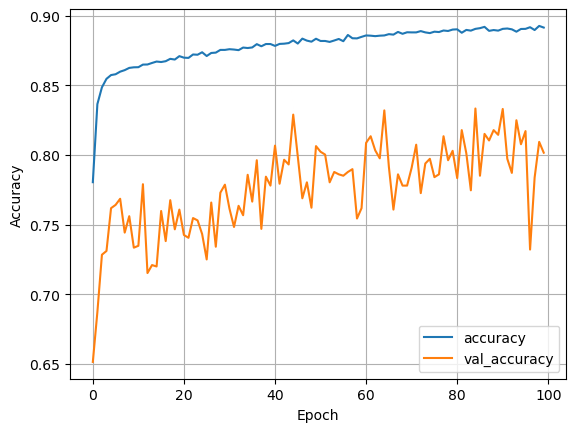

In [37]:
plot_loss(history)
plot_accuracy(history)

# Looking for decreasing loss and increasing accuracy
# You can change the parameters and the point of ML is too see which parameters give the best output

In [38]:
# Do a grid search
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)), 
        tf.keras.layers.Dropout(dropout_prob), # Randomly choose certain nodes at this rate and do not train them, prevents overfitting
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                    metrics=["accuracy"])
    
    history=nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2, verbose=0)
    
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


/Users/marielle/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


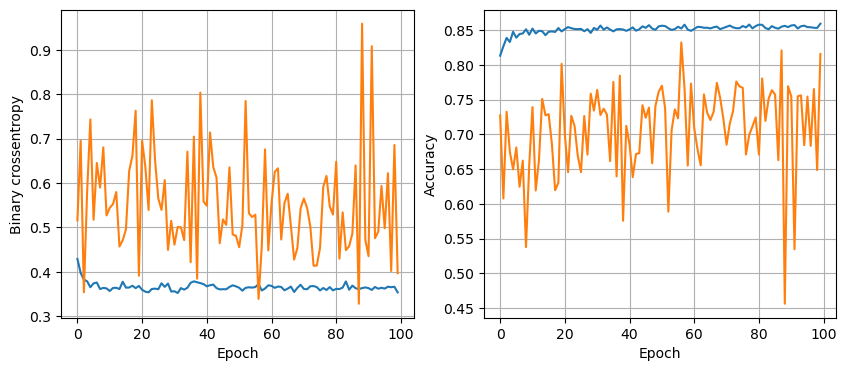

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8538 - loss: 0.4179
16 nodes, dropout 0, lr 0.1, batch size 64


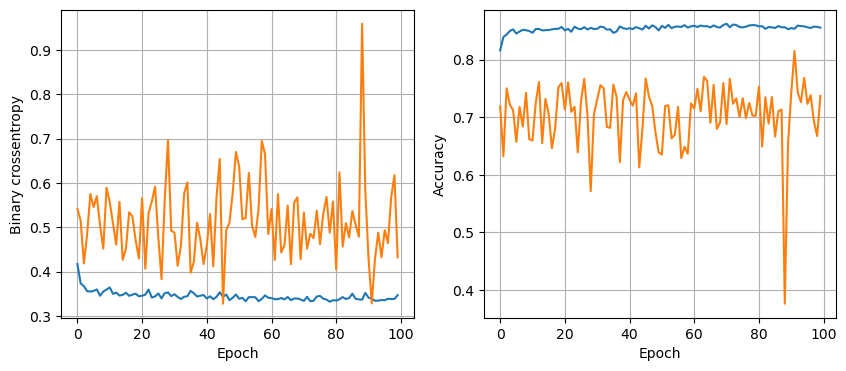

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8584 - loss: 0.3588
16 nodes, dropout 0, lr 0.1, batch size 128


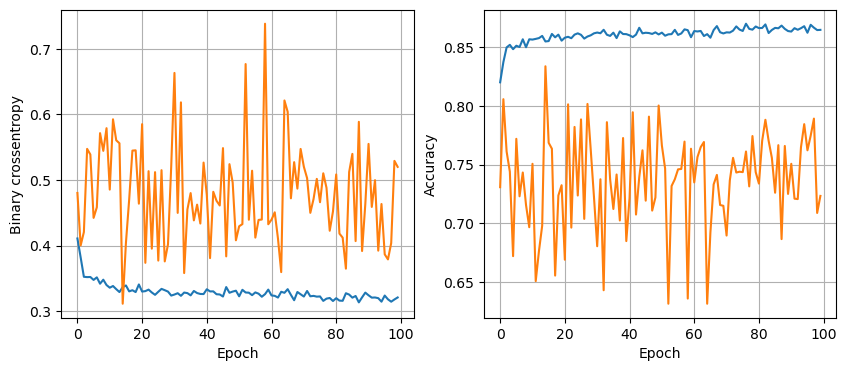

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8690 - loss: 0.3295
16 nodes, dropout 0, lr 0.005, batch size 32


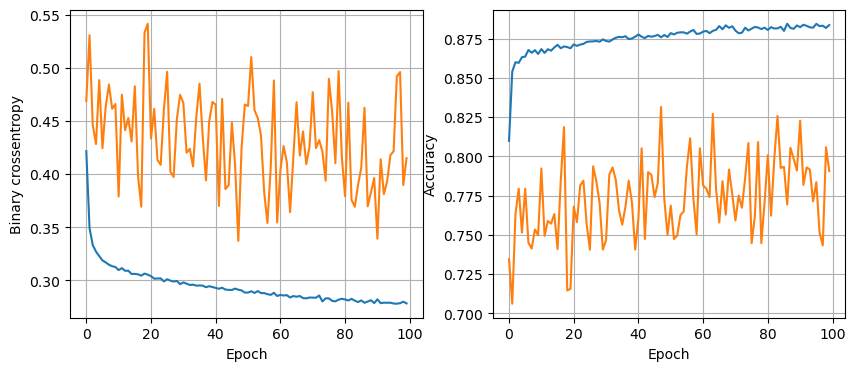

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8639 - loss: 0.3256
16 nodes, dropout 0, lr 0.005, batch size 64


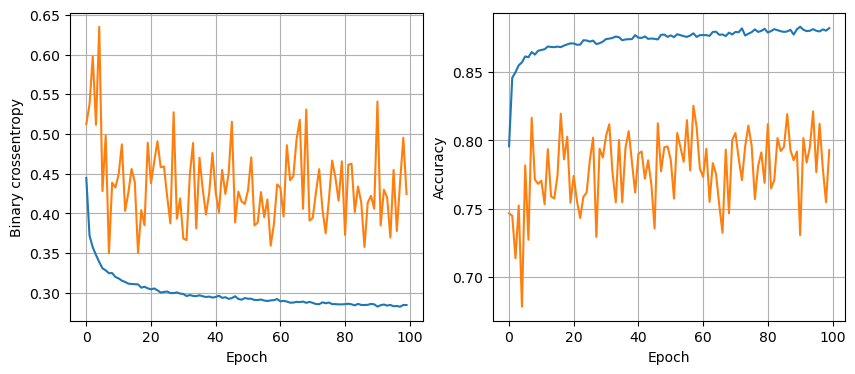

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8671 - loss: 0.3277
16 nodes, dropout 0, lr 0.005, batch size 128


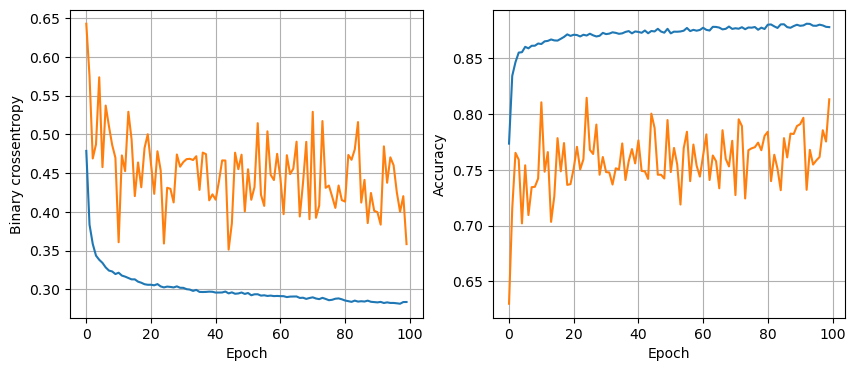

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8659 - loss: 0.3304
16 nodes, dropout 0, lr 0.001, batch size 32


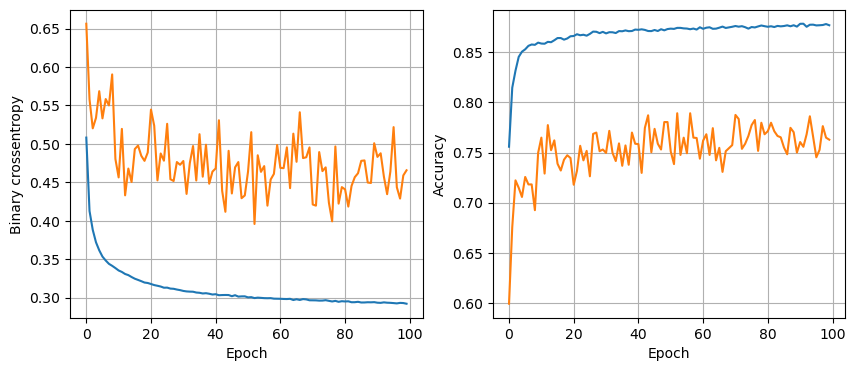

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8609 - loss: 0.3248
16 nodes, dropout 0, lr 0.001, batch size 64


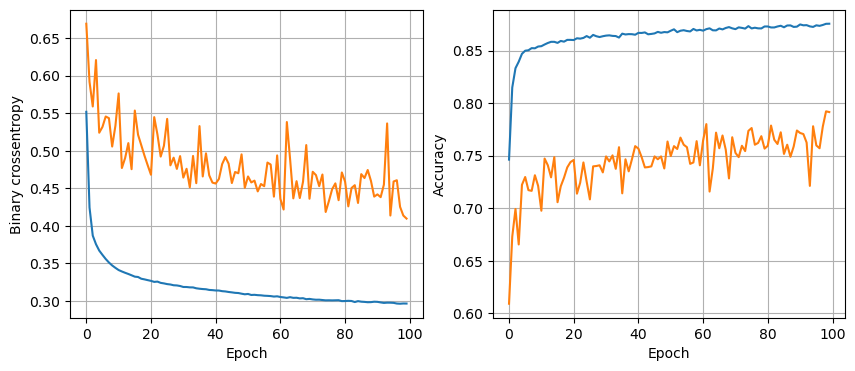

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8660 - loss: 0.3257
16 nodes, dropout 0, lr 0.001, batch size 128


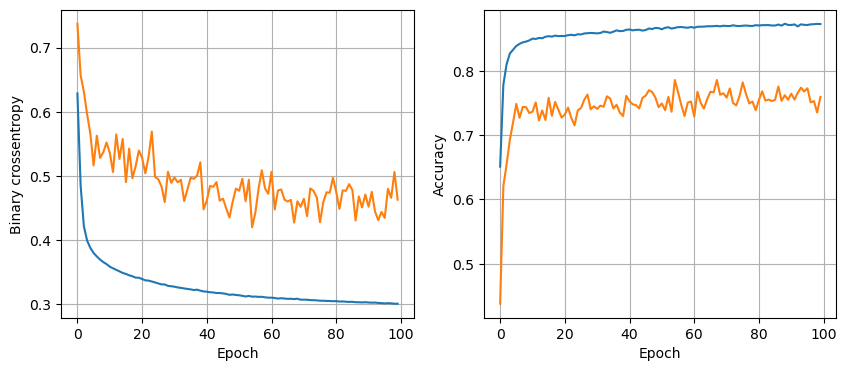

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.8627 - loss: 0.3191
16 nodes, dropout 0.2, lr 0.1, batch size 32


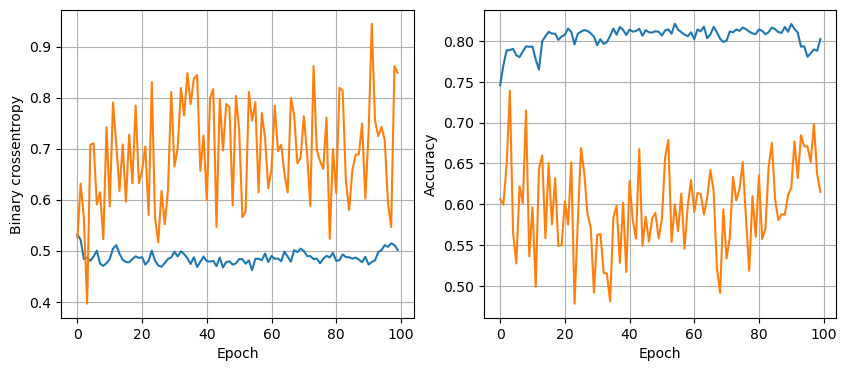

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8308 - loss: 0.4819
16 nodes, dropout 0.2, lr 0.1, batch size 64


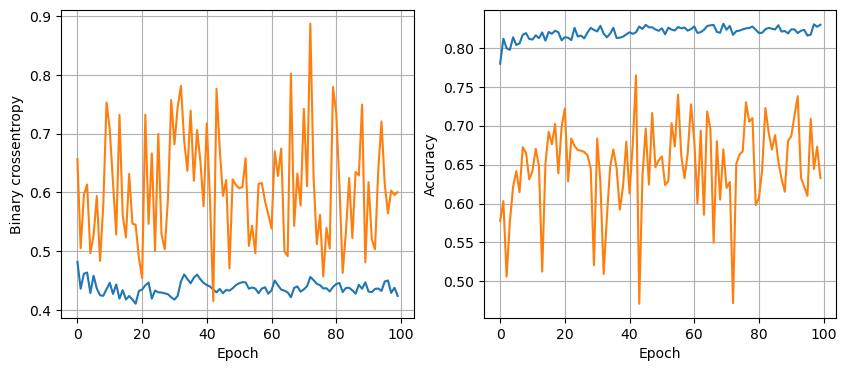

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.8507 - loss: 0.4278
16 nodes, dropout 0.2, lr 0.1, batch size 128


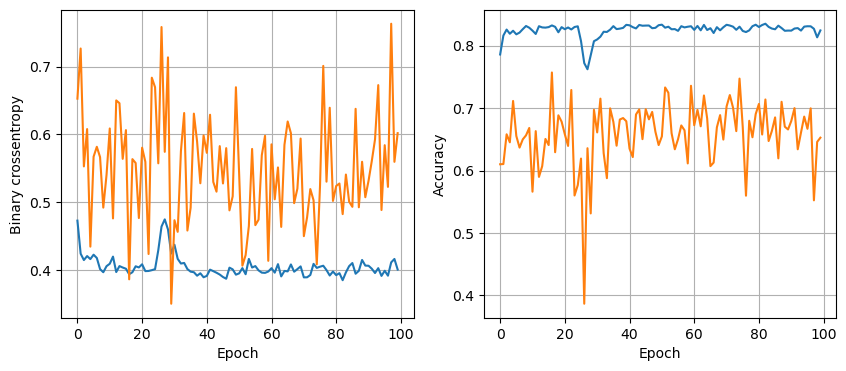

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8433 - loss: 0.3635
16 nodes, dropout 0.2, lr 0.005, batch size 32


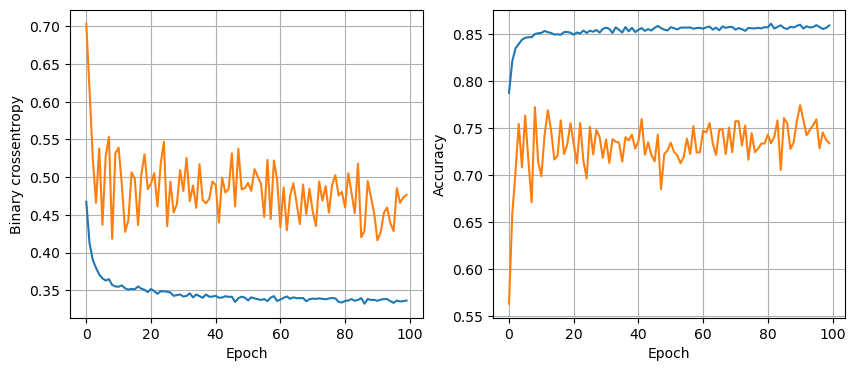

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8645 - loss: 0.3218
16 nodes, dropout 0.2, lr 0.005, batch size 64


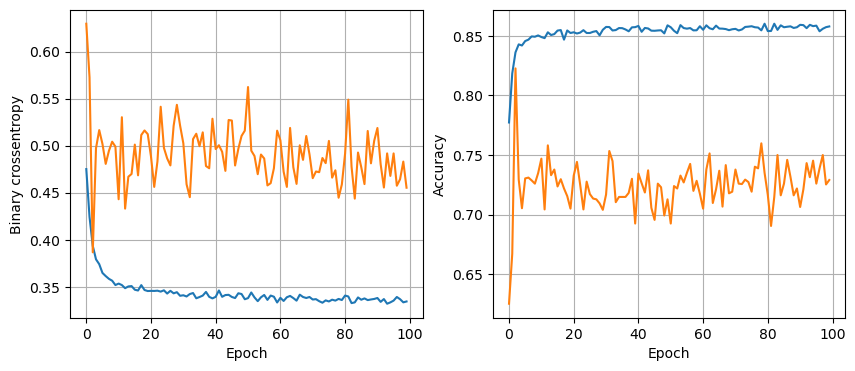

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.8672 - loss: 0.3269
16 nodes, dropout 0.2, lr 0.005, batch size 128


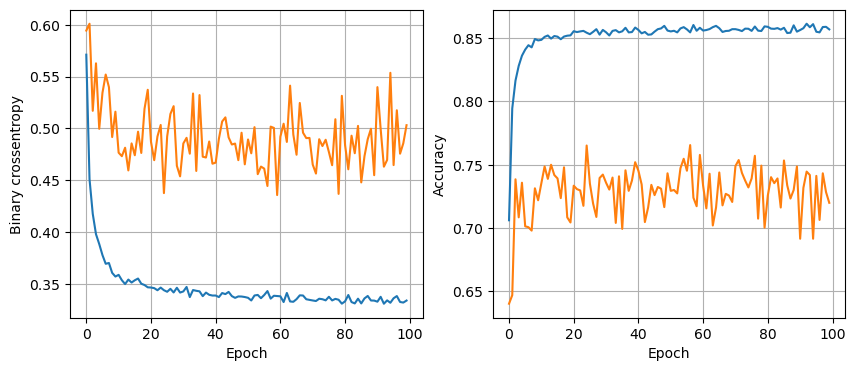

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8681 - loss: 0.3217
16 nodes, dropout 0.2, lr 0.001, batch size 32


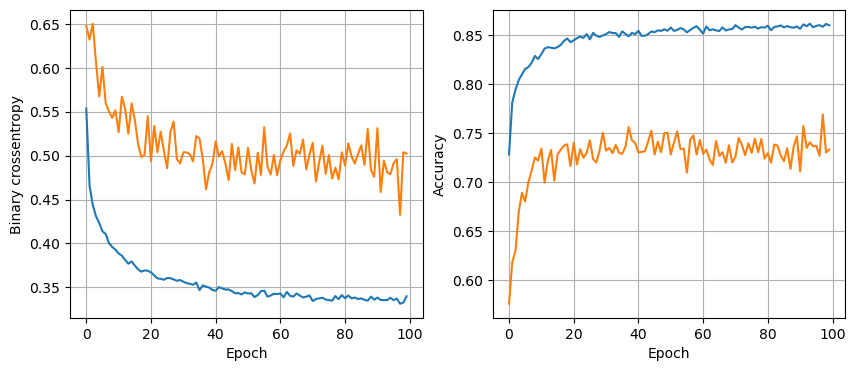

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8648 - loss: 0.3255
16 nodes, dropout 0.2, lr 0.001, batch size 64


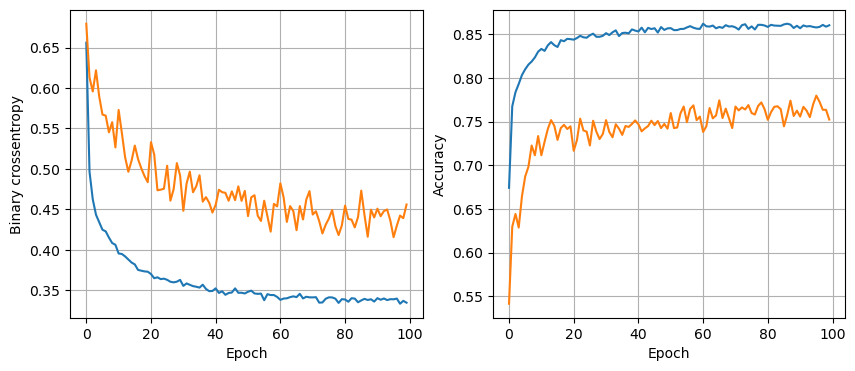

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.8685 - loss: 0.3151
16 nodes, dropout 0.2, lr 0.001, batch size 128


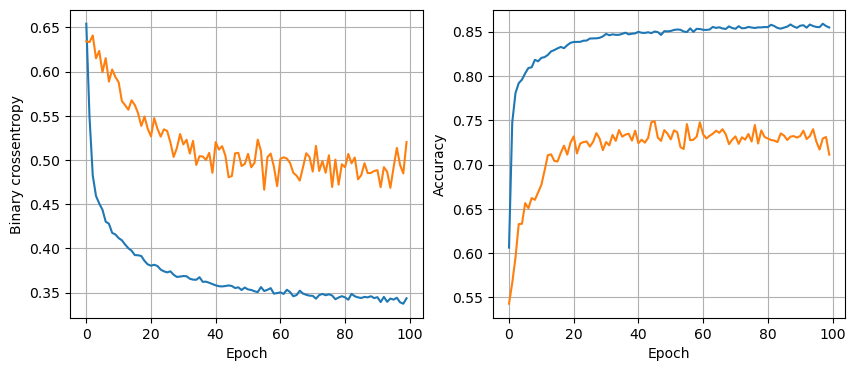

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8657 - loss: 0.3211
32 nodes, dropout 0, lr 0.1, batch size 32


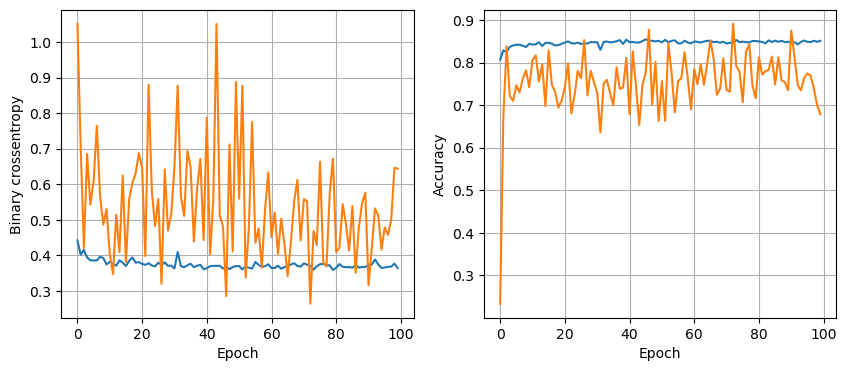

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.8507 - loss: 0.3662
32 nodes, dropout 0, lr 0.1, batch size 64


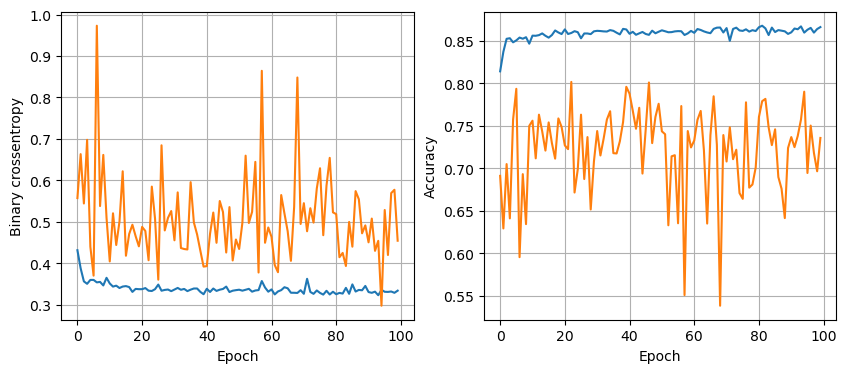

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.8678 - loss: 0.3670
32 nodes, dropout 0, lr 0.1, batch size 128


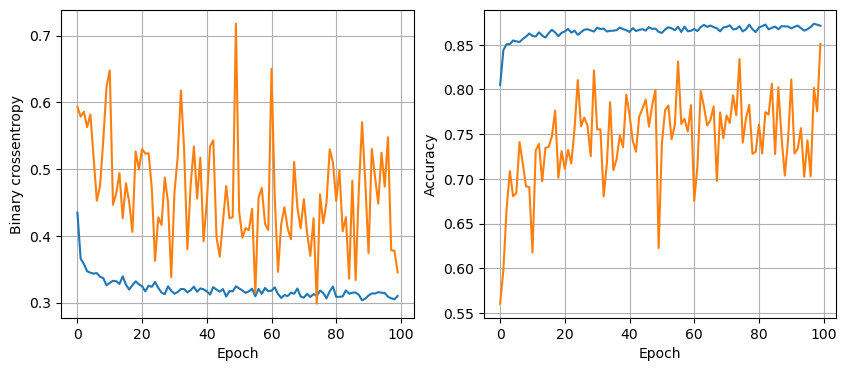

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.8426 - loss: 0.4247
32 nodes, dropout 0, lr 0.005, batch size 32


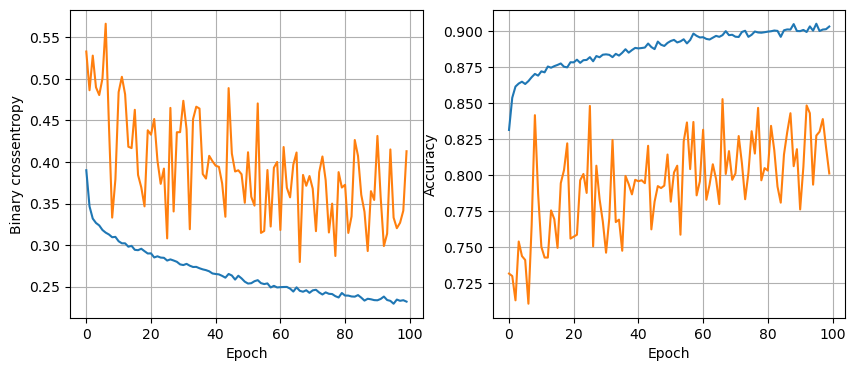

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.8662 - loss: 0.3786
32 nodes, dropout 0, lr 0.005, batch size 64


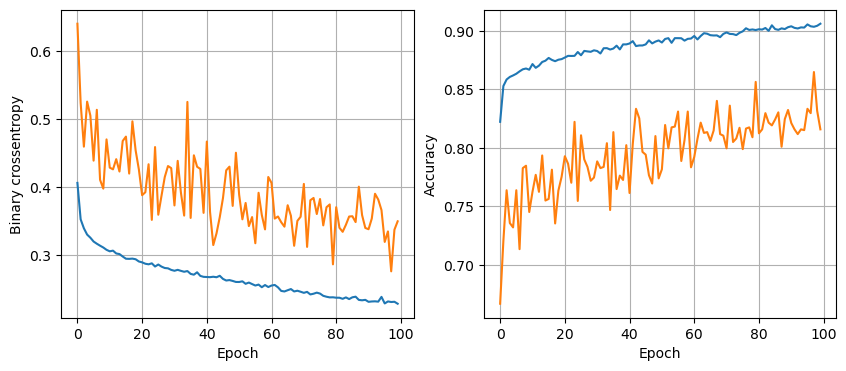

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8668 - loss: 0.3802
32 nodes, dropout 0, lr 0.005, batch size 128


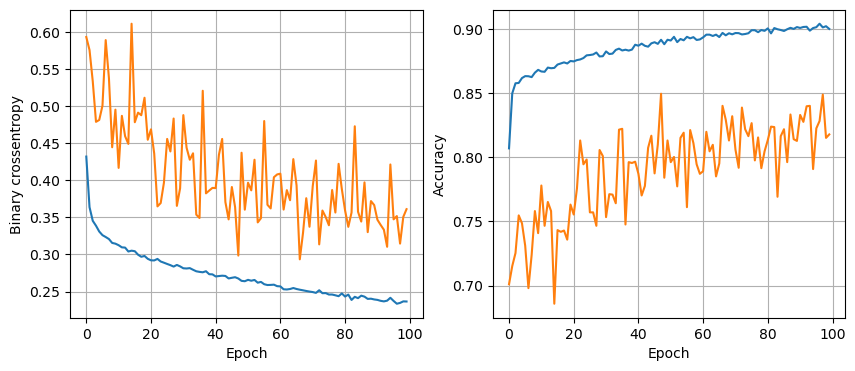

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.8679 - loss: 0.3455
32 nodes, dropout 0, lr 0.001, batch size 32


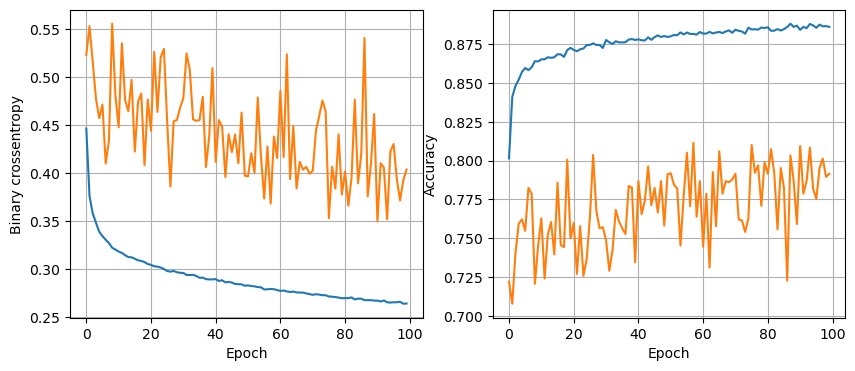

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8697 - loss: 0.3349
32 nodes, dropout 0, lr 0.001, batch size 64


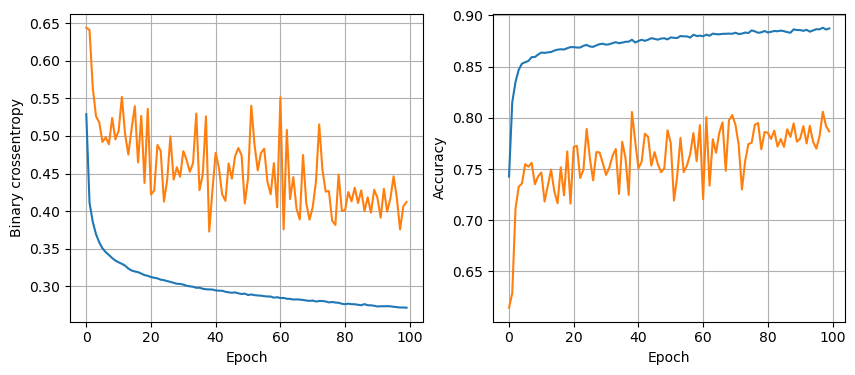

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.8677 - loss: 0.3275
32 nodes, dropout 0, lr 0.001, batch size 128


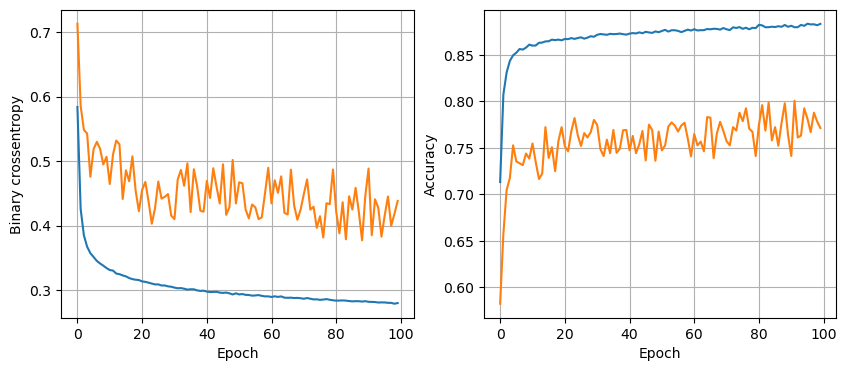

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8690 - loss: 0.3202
32 nodes, dropout 0.2, lr 0.1, batch size 32


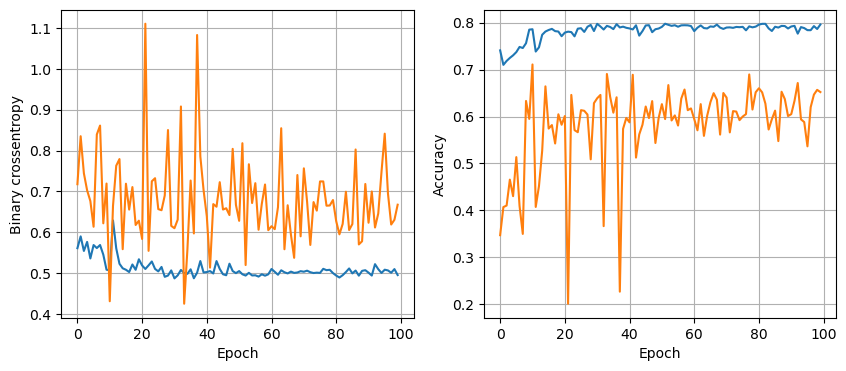

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8400 - loss: 0.4363
32 nodes, dropout 0.2, lr 0.1, batch size 64


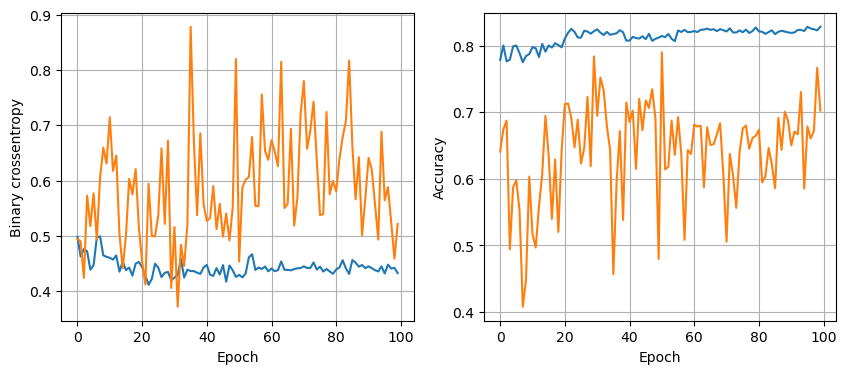

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.8500 - loss: 0.3982
32 nodes, dropout 0.2, lr 0.1, batch size 128


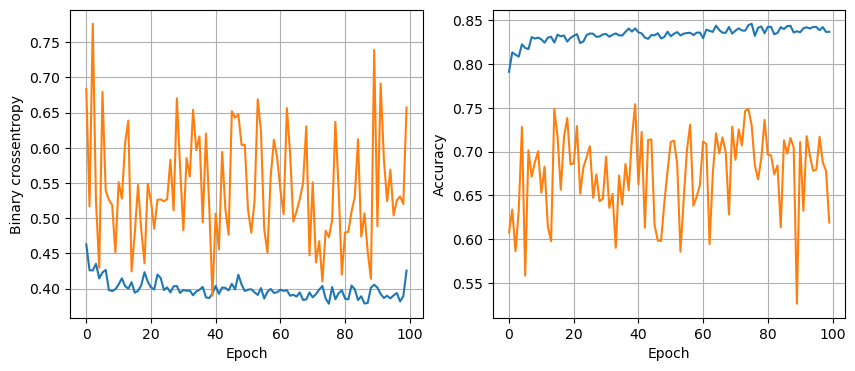

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8458 - loss: 0.3943
32 nodes, dropout 0.2, lr 0.005, batch size 32


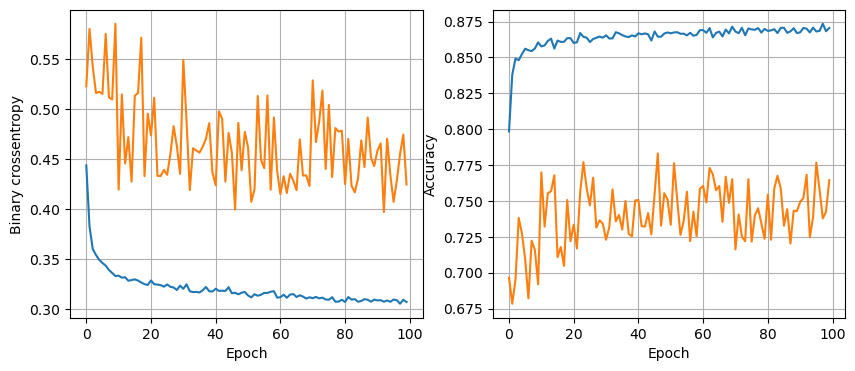

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.8706 - loss: 0.3259
32 nodes, dropout 0.2, lr 0.005, batch size 64


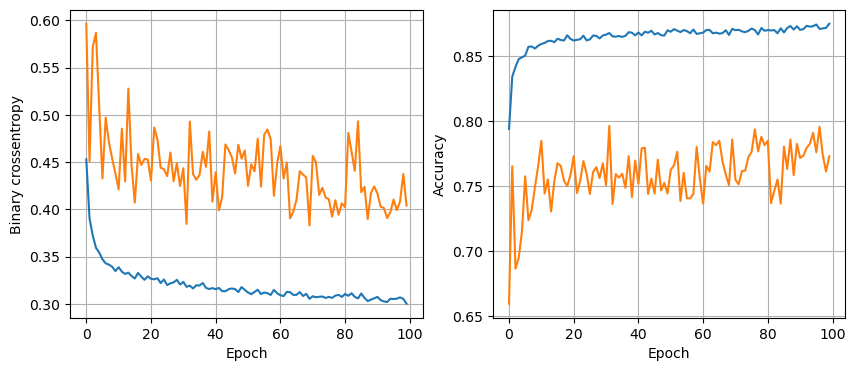

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8746 - loss: 0.3096
32 nodes, dropout 0.2, lr 0.005, batch size 128


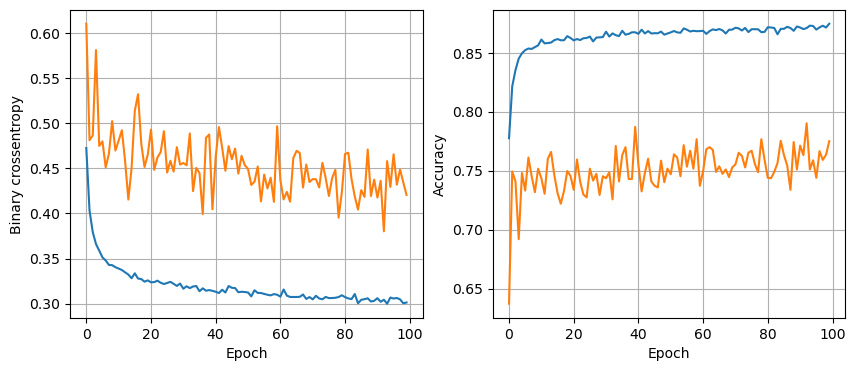

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8782 - loss: 0.3121
32 nodes, dropout 0.2, lr 0.001, batch size 32


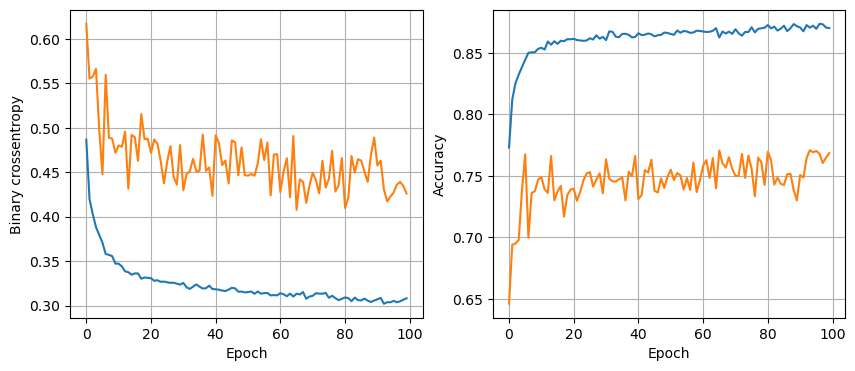

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8683 - loss: 0.3064
32 nodes, dropout 0.2, lr 0.001, batch size 64


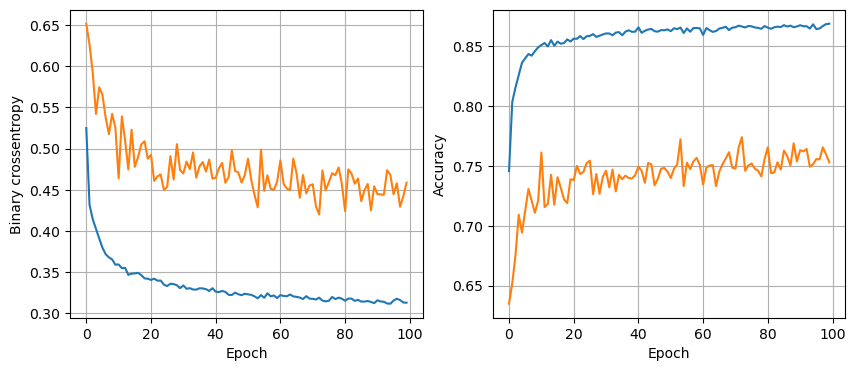

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8669 - loss: 0.3199
32 nodes, dropout 0.2, lr 0.001, batch size 128


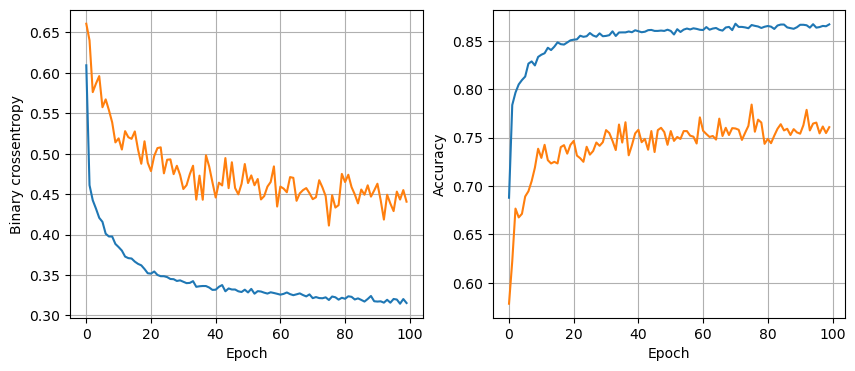

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8705 - loss: 0.3158
64 nodes, dropout 0, lr 0.1, batch size 32


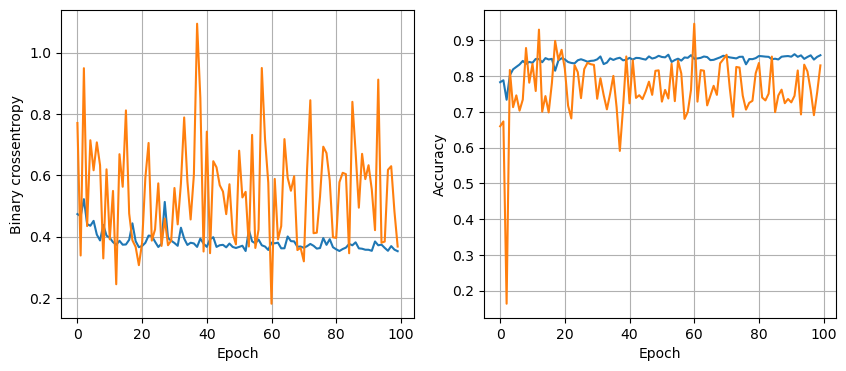

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8464 - loss: 0.3906
64 nodes, dropout 0, lr 0.1, batch size 64


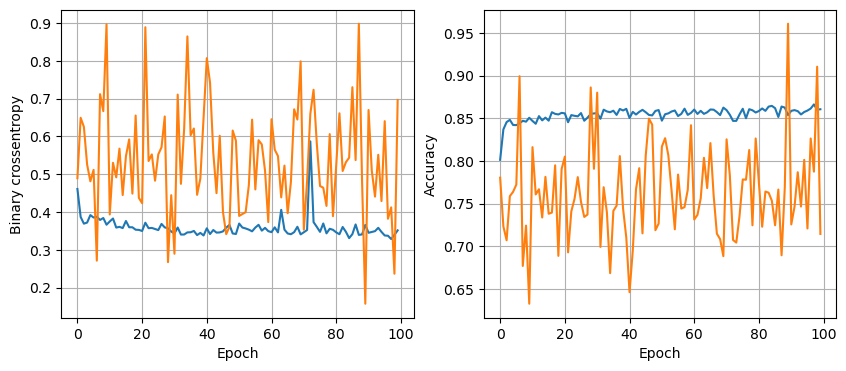

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8551 - loss: 0.4288
64 nodes, dropout 0, lr 0.1, batch size 128


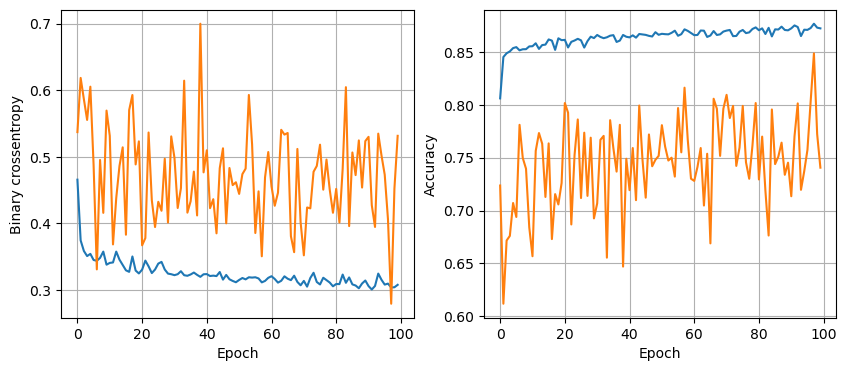

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.8701 - loss: 0.3445
64 nodes, dropout 0, lr 0.005, batch size 32


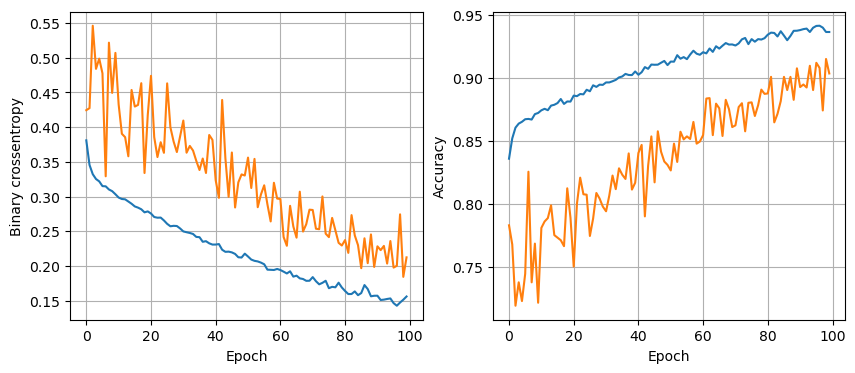

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8613 - loss: 0.6387
64 nodes, dropout 0, lr 0.005, batch size 64


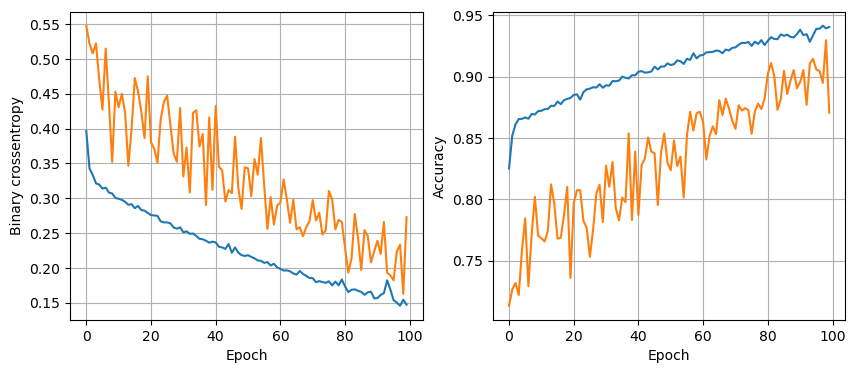

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8588 - loss: 0.5323
64 nodes, dropout 0, lr 0.005, batch size 128


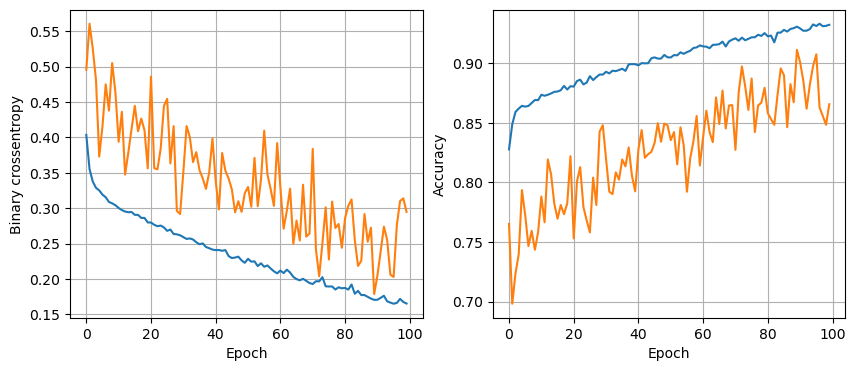

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8609 - loss: 0.5155
64 nodes, dropout 0, lr 0.001, batch size 32


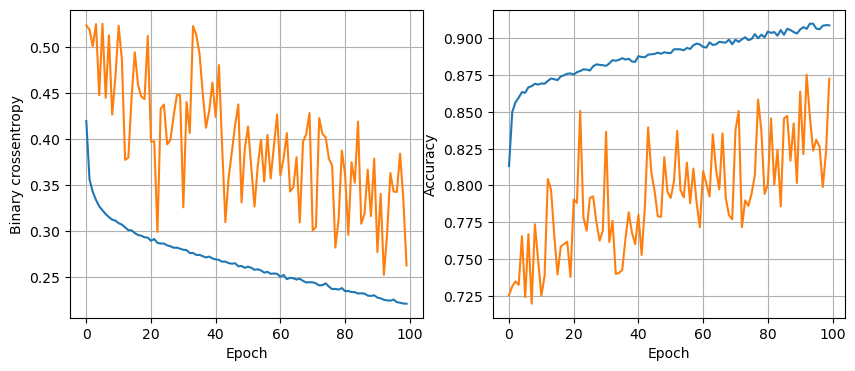

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8623 - loss: 0.3665
64 nodes, dropout 0, lr 0.001, batch size 64


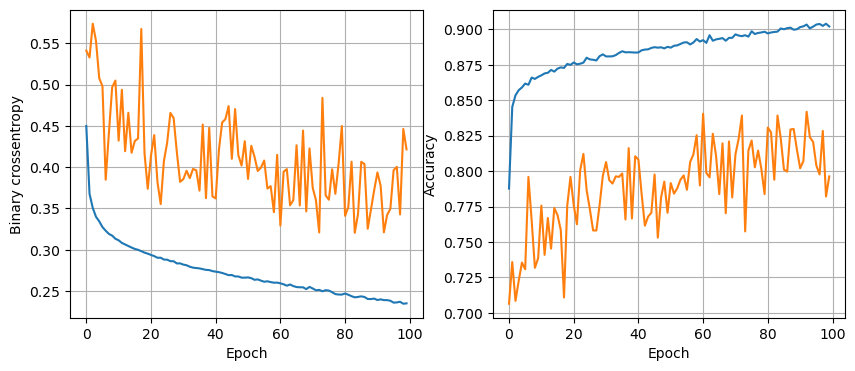

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - accuracy: 0.8732 - loss: 0.3472
64 nodes, dropout 0, lr 0.001, batch size 128


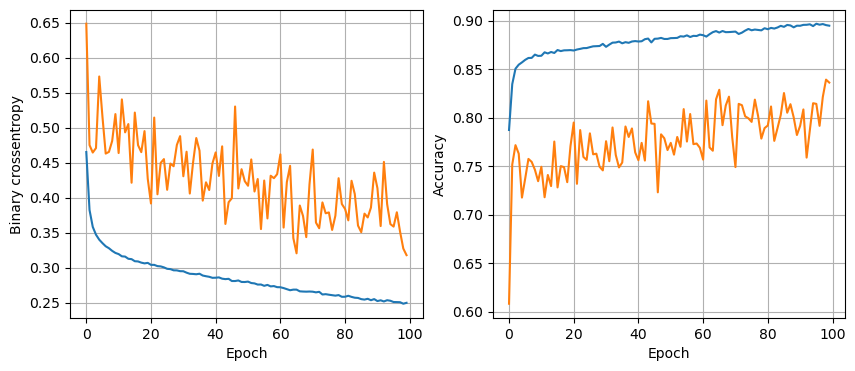

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8681 - loss: 0.3267
64 nodes, dropout 0.2, lr 0.1, batch size 32


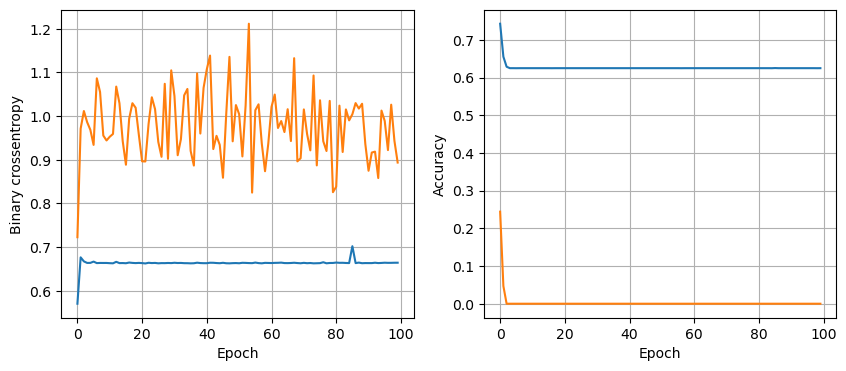

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.6467 - loss: 0.6560
64 nodes, dropout 0.2, lr 0.1, batch size 64


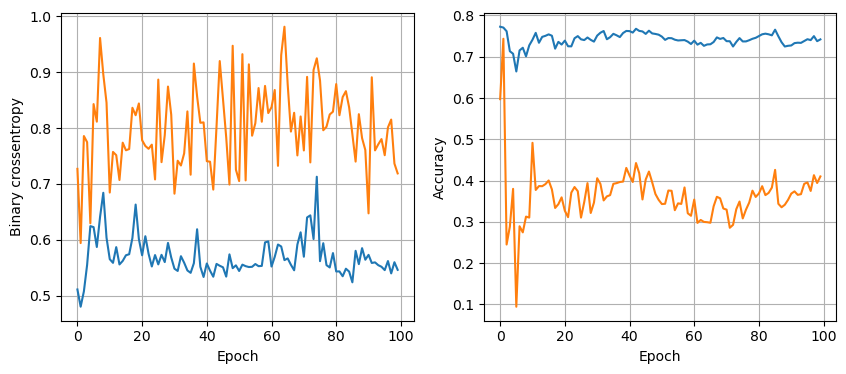

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7782 - loss: 0.5497
64 nodes, dropout 0.2, lr 0.1, batch size 128


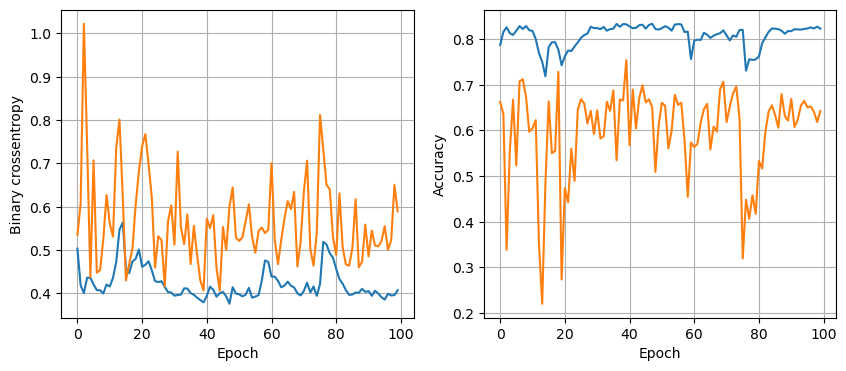

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8499 - loss: 0.3632
64 nodes, dropout 0.2, lr 0.005, batch size 32


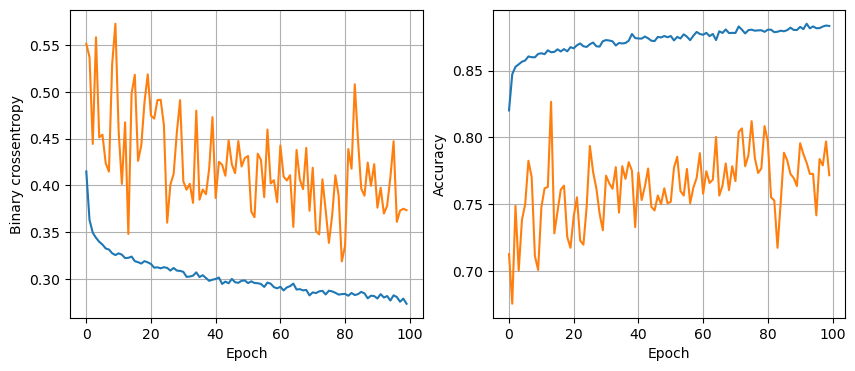

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8779 - loss: 0.3256
64 nodes, dropout 0.2, lr 0.005, batch size 64


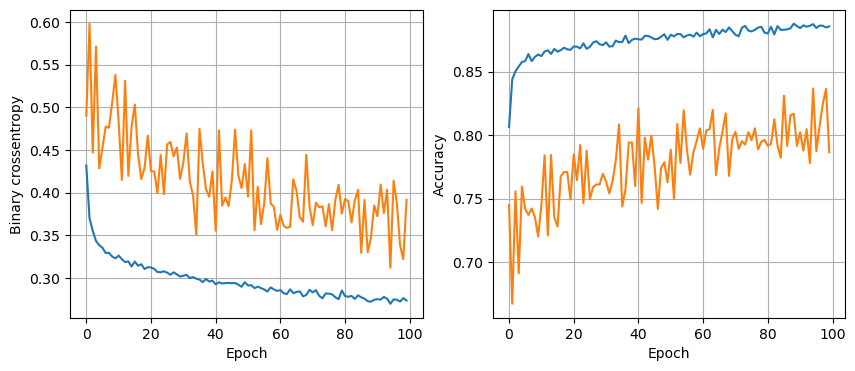

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.8728 - loss: 0.3179
64 nodes, dropout 0.2, lr 0.005, batch size 128


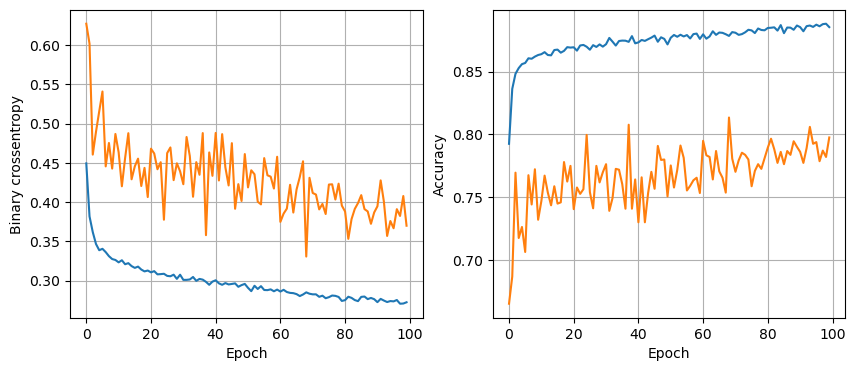

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.8743 - loss: 0.3103
64 nodes, dropout 0.2, lr 0.001, batch size 32


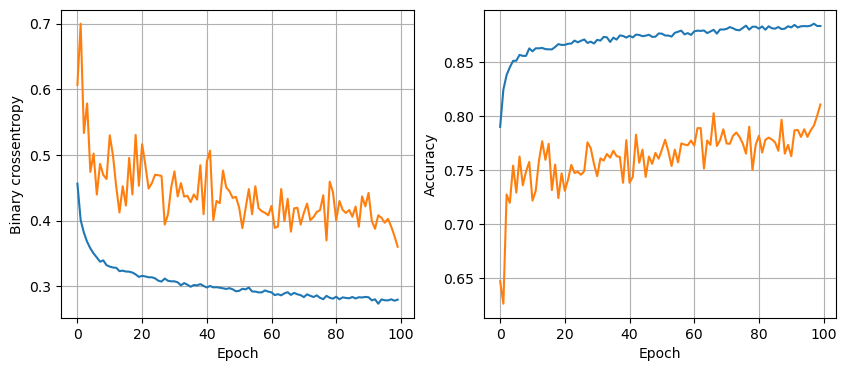

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.8768 - loss: 0.3041
64 nodes, dropout 0.2, lr 0.001, batch size 64


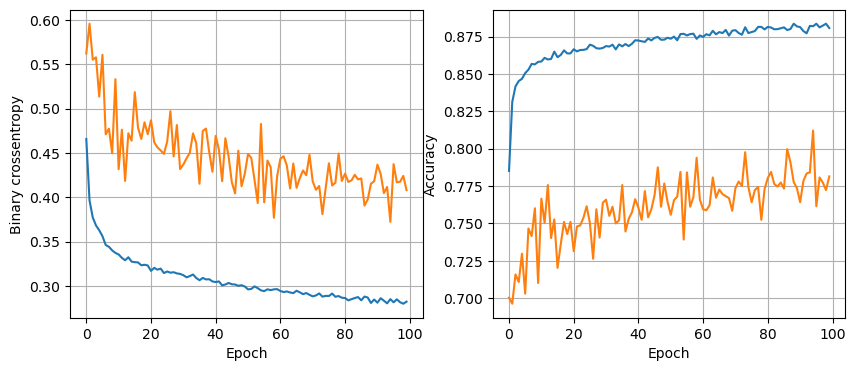

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8696 - loss: 0.3106
64 nodes, dropout 0.2, lr 0.001, batch size 128


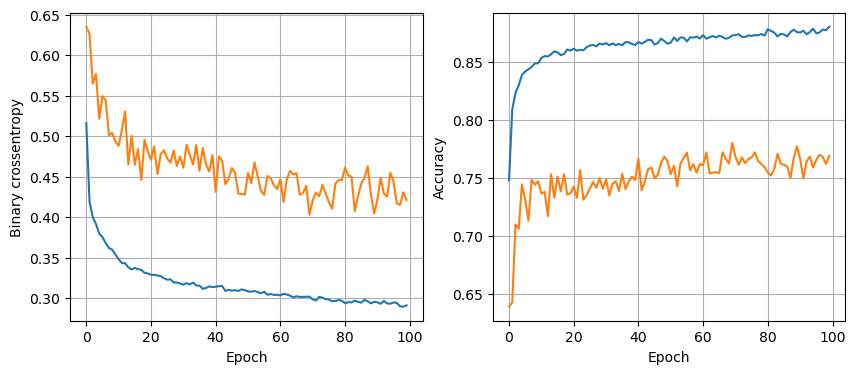

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8758 - loss: 0.3042


In [46]:
least_val_loss=float("inf")
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history=train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss=model.evaluate(X_valid, y_valid)[0]
                if val_loss<least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model

In [48]:
y_pred=least_loss_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,) # Reshapes to 1D
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


array([1, 0, 1, ..., 0, 1, 1])

In [50]:
print(classification_report(y_test, y_pred))

# 88% which is 1 better than SVM yay! Neural networds are very powerful tools

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1339
           1       0.89      0.93      0.91      2465

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.88      3804

